## HomeWork 1 Due at Mid-night 3/10/2021

### This homework is on Exploratory Data Analysis and will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [52]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [53]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Professor Salaries dataset ##

In [54]:
salary = pd.read_csv("Salaries1.csv")
print(salary.shape)
salary.head()

(401, 6)


,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18,Male,139750
1,Prof,B,20.0,16,Male,173200
2,AsstProf,B,4.0,3,Male,79750
3,Prof,B,45.0,39,Male,115000
4,Prof,B,40.0,41,Male,141500


In [55]:
salary.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
396,Prof,A,33.0,30,Male,103106
397,Prof,A,31.0,19,Male,150564
398,Prof,A,42.0,25,Male,101738
399,Prof,A,25.0,15,Male,95329
400,AsstProf,A,8.0,4,Male,81035


In [56]:
salary.Discipline.unique()

array(['B', 'A'], dtype=object)

In [57]:
salary.Rank.unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

## Question 1. Check if there are any nulls or NA's.

In [58]:
salary.isnull().any()

Rank            False
Discipline      False
YrsSincePhd      True
YrsOfService    False
Sex              True
Salary          False
dtype: bool

## Question 2. Remove any rows that have nulls or NA's.

In [59]:
df = pd.DataFrame(salary)

In [60]:
df = df[df['YrsSincePhd'].notna()]

In [62]:
df = df[df['Sex'].notna()]

In [63]:
df.isnull().any()

Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService    False
Sex             False
Salary          False
dtype: bool

## Question 3. Check if there are any outliers in all numerical fields using scatter plots and boxplots.

#### Running 3 scatter plots for all 3 combinations of the data (3 Choose 2)

<AxesSubplot:xlabel='YrsSincePhd', ylabel='YrsOfService'>

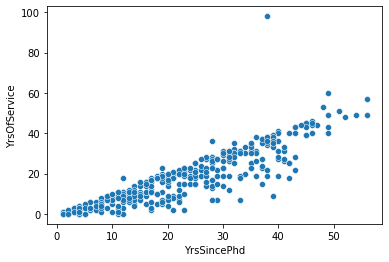

In [64]:
sns.scatterplot(x='YrsSincePhd', y='YrsOfService', data=df)

<AxesSubplot:xlabel='YrsSincePhd', ylabel='Salary'>

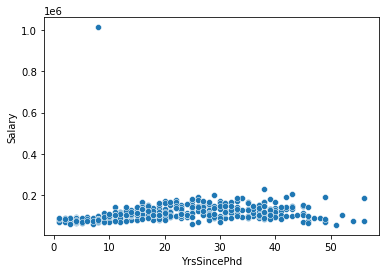

In [65]:
sns.scatterplot(x='YrsSincePhd', y='Salary', data=df)

<AxesSubplot:xlabel='YrsOfService', ylabel='Salary'>

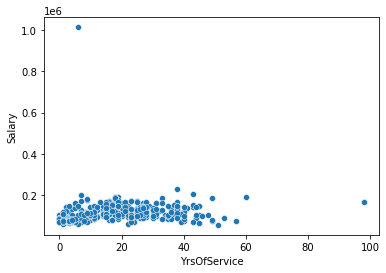

In [66]:
sns.scatterplot(x='YrsOfService', y='Salary', data=df)

<AxesSubplot:ylabel='Salary'>

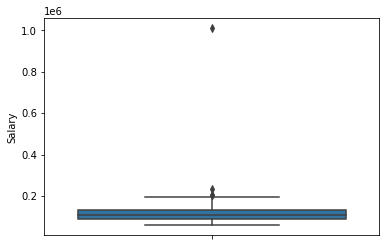

In [67]:
sns.boxplot(y=df['Salary'])

<AxesSubplot:ylabel='YrsOfService'>

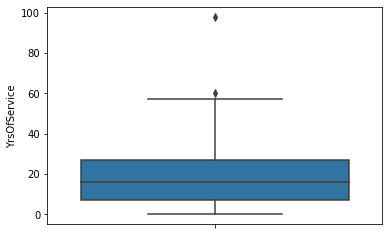

In [68]:
sns.boxplot(y=df['YrsOfService'])

<AxesSubplot:ylabel='YrsSincePhd'>

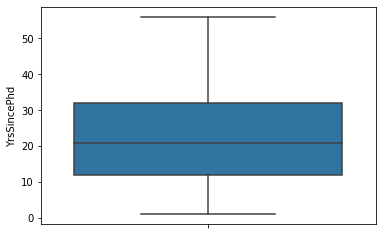

In [69]:
sns.boxplot(y=df['YrsSincePhd'])

## Question 4. Display and remove the outlier rows. 

In [70]:
temp = df[df['YrsOfService'] >80 ]
temp = df[df['Salary'] > 500000]

<AxesSubplot:xlabel='YrsOfService', ylabel='Salary'>

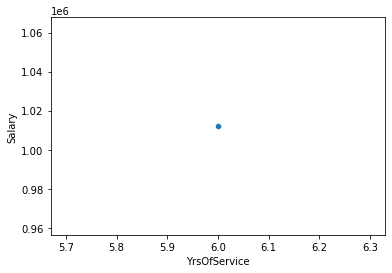

In [72]:
sns.scatterplot(x='YrsOfService', y='Salary', data = temp)

<AxesSubplot:xlabel='YrsOfService', ylabel='Salary'>

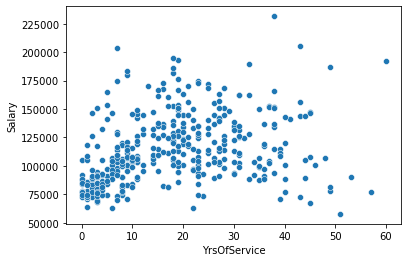

In [73]:
df = df[df['YrsOfService'] < 80]
df = df[df['Salary'] < 500000]
sns.scatterplot(x='YrsOfService', y='Salary', data = df)

## Question 5. Calculate the average years of service for each rank using SQL. Then, Calculate the average years of service for each sex using SQL.

In [74]:
ps.sqldf("select Rank, avg(YrsOfService) from df as s group by Rank")

,Rank,avg(YrsOfService)
0,AssocProf,11.953125
1,AsstProf,2.373134
2,Prof,22.815789


In [75]:
ps.sqldf("select Sex, avg(YrsOfService) from df as s group by Sex")

,Sex,avg(YrsOfService)
0,Female,11.564103
1,Male,18.273743


## Question 6. Calculate the average salary by discipline using SQL. Then, calculate the average salary by sex using SQL.

In [58]:
ps.sqldf("select Discipline, avg(Salary) from salary as s group by Discipline")

,Discipline,avg(Salary)
0,A,108545.967033
1,B,117962.262673


In [59]:
ps.sqldf("select Sex, avg(Salary) from salary as s group by Sex")

,Sex,avg(Salary)
0,None,103613.000000
1,Female,101002.410256
2,Male,115070.947075


## Question 7. For each rank, calculate the number of occurences, the mean salary, the minimum salary, and the maximum salary using one SQL statement.

In [77]:
ps.sqldf("select Rank, count(*) as 'Number of Occurrences', avg(Salary), min(Salary), max(Salary) from salary as s group by Rank")

,Rank,Number of Occurrences,avg(Salary),min(Salary),max(Salary)
0,AssocProf,66,107936.439394,62884,1012100
1,AsstProf,67,80775.985075,63100,97032
2,Prof,268,126848.899254,57800,231545


## Question 8. Answer Question 7 using Pandas functions

In [76]:
salary.groupby('Rank').describe()

YrsSincePhd                                                      \
                count       mean        std   min   25%   50%   75%   max   
Rank                                                                        
AssocProf        66.0  15.272727   9.562017   6.0  10.0  12.0  17.0  49.0   
AsstProf         67.0   5.104478   2.541381   1.0   3.5   4.0   7.0  11.0   
Prof            267.0  28.337079  10.107256  11.0  20.0  28.0  37.0  56.0   

          YrsOfService             ...              Salary                 \
                 count       mean  ...    75%   max  count           mean   
Rank                               ...                                      
AssocProf         66.0  11.848485  ...  11.00  53.0   66.0  107936.439394   
AsstProf          67.0   2.373134  ...   3.00   6.0   67.0   80775.985075   
Prof             268.0  23.044776  ...  30.25  98.0  268.0  126848.899254   

                                                                              
                     std      min        25%       50%        75%        max  
Rank                                                                          
AssocProf  113830.852466  62884.0   82700.00   96321.0  104436.75  1012100.0  
AsstProf     8174.112637  63100.0   74000.00   79800.0   88597.50    97032.0  
Prof        27742.386907  57800.0  106145.75  123321.5  145123.50   231545.0  

[3 rows x 24 columns]

## Question 9. Calculate the standard deviation, skew and kurtosis for YrsSincePhd, YrsOfService and salary for each rank.

In [82]:
ysp = df.groupby('Rank')['YrsSincePhd']
yos = df.groupby('Rank')['YrsOfService']
sal = df.groupby('Rank')['Salary']

In [83]:
print("Stdev: {}\n".format(ysp.std()))
print("Skew: {}\n".format(ysp.skew()))
print("Kurtosis:{}\n".format(df.groupby(['Rank']).apply(pd.DataFrame.kurt)))

Stdev: Rank
AssocProf     9.652584
AsstProf      2.541381
Prof         10.108830
Name: YrsSincePhd, dtype: float64

Skew: Rank
AssocProf    2.139123
AsstProf     0.524578
Prof         0.358756
Name: YrsSincePhd, dtype: float64

Kurtosis:           YrsSincePhd  YrsOfService    Salary
Rank                                          
AssocProf     4.414356      6.350832 -0.586327
AsstProf     -0.358052     -0.658746 -0.920936
Prof         -0.619154     -0.225623  0.376064



## Question 10. Plot the histogram of YrsOfService and Salary for different Ranks using 5 bins

Rank
AssocProf    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
AsstProf     [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Prof         [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

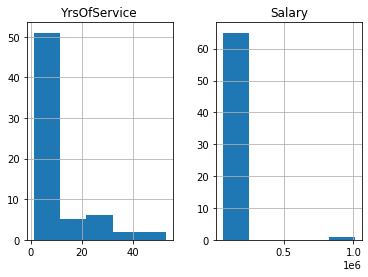

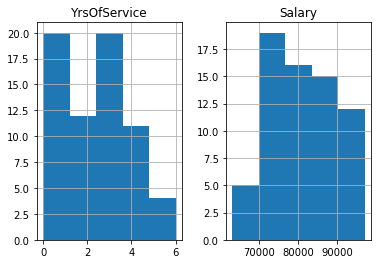

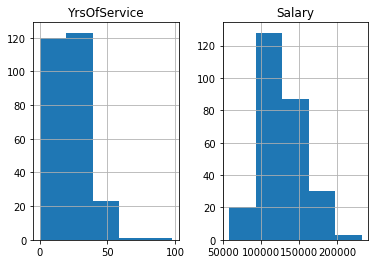

In [81]:
temp = salary.drop(columns='YrsSincePhd')
temp.groupby('Rank').hist(bins=5)

## Question 11. Describe the YrsOfService and Salary distributions for each rank. Use the skew and kurotsis in your descriptions.
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

Associate professors have a high skew. This indicates that there is a small number of them who make a lot more money than most other associate professors.

Both asst profs and profs have close to normal distributed salaries. This indicates that their salaries are about normally distributed.

No one has negative skew.

Both assoc prof and asst prof have slight negative kurtosis (<-1) indicating that there aren't that many of them who deviate far from the mean. There aren't that many outliers.

Profs have a positive kurtosis, but small, indicating that they are also about normally distributed, but there are outleirs, as indicated by the positive kurtosis.

Since associate profs. have a high skew, but low kurtosis, there are some few of them who are making a lot more than the rest.

## Question 12. Calculate correlations of all the factors among themselves and determine which factors among YrsSincePhd or YrsOfService will affect Salary the most. Will your answers change if you break it down by Sex and by Discipline?

In [84]:
df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909649,0.419231
YrsOfService,0.909649,1.000000,0.334745
Salary,0.419231,0.334745,1.000000


Based on just Years since phd and/or years of service there is no indicator of what is the impacts the salary the most.

In [88]:
df.groupby('Discipline').corr()

YrsSincePhd  YrsOfService    Salary
Discipline                                                  
A          YrsSincePhd      1.000000      0.916403  0.401158
           YrsOfService     0.916403      1.000000  0.235969
           Salary           0.401158      0.235969  1.000000
B          YrsSincePhd      1.000000      0.899218  0.535197
           YrsOfService     0.899218      1.000000  0.502052
           Salary           0.535197      0.502052  1.000000

When we look just by discipline there appears to be no correlation between either Years since phd nor Years of service on A's Salary. For B their might, but nothing to exciting (it is near half, so not so great)

In [86]:
df.groupby('Sex').corr()

YrsSincePhd  YrsOfService    Salary
Sex                                                     
Female YrsSincePhd      1.000000      0.857775  0.620135
       YrsOfService     0.857775      1.000000  0.556021
       Salary           0.620135      0.556021  1.000000
Male   YrsSincePhd      1.000000      0.910520  0.392718
       YrsOfService     0.910520      1.000000  0.306599
       Salary           0.392718      0.306599  1.000000

For females, there appears to be some impact between Years since their phd and their salary. Their might be some impact between thier Years of Service and their salary, but not much to get excited about.
For males, there appears to be no impact of Years since phd nor years of service on their salaries.

In [91]:
df.groupby(['Sex', 'Discipline']).corr()

YrsSincePhd  YrsOfService    Salary
Sex    Discipline                                                  
Female A          YrsSincePhd      1.000000      0.865230  0.719449
                  YrsOfService     0.865230      1.000000  0.439157
                  Salary           0.719449      0.439157  1.000000
       B          YrsSincePhd      1.000000      0.860453  0.823121
                  YrsOfService     0.860453      1.000000  0.827617
                  Salary           0.823121      0.827617  1.000000
Male   A          YrsSincePhd      1.000000      0.917345  0.351962
                  YrsOfService     0.917345      1.000000  0.187285
                  Salary           0.351962      0.187285  1.000000
       B          YrsSincePhd      1.000000      0.899454  0.517119
                  YrsOfService     0.899454      1.000000  0.482728
                  Salary           0.517119      0.482728  1.000000

When we look at this, we see that for men, there isn't anything that screams an impact between Years since their phd nor their years of service.
For females, for B disciplines, we can an impact between their years of service and their years since phd on their salary. For Females in A discipline there isn't any significant correlation.

### Now Load a different dataset (MPG dataset number 3)

In [92]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code here to fix the missing values by imputing value from the mean

In [93]:
mpg.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [96]:
mpg['mpg'] = mpg['mpg'].fillna(mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna(mpg['weight'].mean())

In [97]:
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool